<a href="https://colab.research.google.com/github/NicKostii/UniProjects/blob/main/AFER/%D0%90%D0%A4%D0%95%D0%A0_%D0%9B%D0%A0%E2%84%961.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабороторна робота №1
# 🍾🥰 🥇
### Тема: Перевірка, заповнення та фільтрація даних часового ряду.
Виконала наступна команда:  
* 👴 Григор'єв Андрій КА-15,  
* 👶 Коробій Максим КА-15,  
* 👱 Тюкалов Ніколай КА-13,  
* 🧑 Хлєвнушко Ярослав КА-15.  

## 📜 Умови

1. Обрати набір даних (датасет), який буде представляти собою часовий ряд (одновимірний
або багатовимірний).  
Дата сет можна знайти на сайті kaggle, або будь який на ваш вибір, головне, щоб дані були
репрезентативними і містили певну кількість записів для роботи з ними.
2. Зобразіть часовий ряд графічно (одним графіком якщо це однокритеріальна задача,
декількома - якщо багатокритеріальна).
3. Виконайте попередню обробку часового ряду:
- Перевірте дані на пропуски
- Виконайте фільтрацію даних часового ряду
- Зменшіть кількість атрибутів (у разі якщо це багатовимірний часовий ряд)

Приклади датасетів:
* https://www.kaggle.com/datasets/dhavalpatel555/us-stock-market-2020-to-2024?resource=download
* https://www.kaggle.com/datasets/michau96/device-market-in-india-over-last-15-years
* https://www.kaggle.com/datasets/shivamb/underwater-surface-temperature-dataset

Було обрано власний датасет - [**Daily Gold Price (2015-2024) Time Series**](https://www.kaggle.com/datasets/nisargchodavadiya/daily-gold-price-20152021-time-series/data).

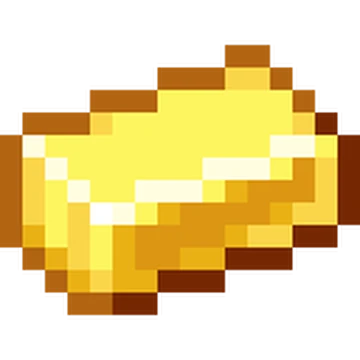

## 🔧 Підготовка

Завантажемо необхідні бібліотеки та наш датасет.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install --quiet pykalman
from pykalman import KalmanFilter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.5/248.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.5/141.5 kB 9.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Gold Price.csv", encoding='ISO-8859-1')

## 📊 Огляд датасету

У датасеті містяться данні про ціну золота в кожен день з 2014-01-01 по 2024-10-31.

Джерело: MCX Market.

Змінні:
* Дата (Date)
* ⭐️ Фінальна ціна (Price)
* Ціна на початку (Open)
* Найвищча ціна (High)
* Найнижча ціна (Low)
* Об'єм торговлі (Volume)
* Зміна ціни в відсотках (Chg%)

In [ ]:
df

,Date,Price,Open,High,Low,Volume,Chg%
0,2024-11-06,77030,78300,78570,77030,0,-1.86
1,2024-11-05,78490,78224,78670,78160,0,0.11
2,2024-11-04,78401,78498,78642,78237,0,-0.54
3,2024-11-01,78829,78650,78887,78550,0,0.64
4,2024-10-31,78326,79264,79999,77803,90,-1.17
...,...,...,...,...,...,...,...
2801,2014-01-06,29119,29300,29395,29051,24380,-0.55
2802,2014-01-04,29279,29279,29279,29279,0,-1.51
2803,2014-01-03,29727,30031,30125,29539,3050,-0.83
2804,2014-01-02,29975,29678,30050,29678,3140,1.47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2806 non-null   object 
 1   Price   2806 non-null   int64  
 2   Open    2806 non-null   int64  
 3   High    2806 non-null   int64  
 4   Low     2806 non-null   int64  
 5   Volume  2806 non-null   int64  
 6   Chg%    2806 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 153.6+ KB


Як можна побачити маємо 7 змінних, що були зазанчені раніше.    

Всі колонки крім Date є цифровими та не потребують будь яких змін.

Date треба перевести з формату Object до Datetime

In [ ]:
df.isna().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Volume,0
Chg%,0


На перший погляд відсутніх данних немає.

## ♻️ Переведення колонки Date в формат Datetime

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2806 non-null   datetime64[ns]
 1   Price   2806 non-null   int64         
 2   Open    2806 non-null   int64         
 3   High    2806 non-null   int64         
 4   Low     2806 non-null   int64         
 5   Volume  2806 non-null   int64         
 6   Chg%    2806 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 153.6 KB


## ✅ Перевірка неперевності та рівномірності данних

In [ ]:
test = df

In [ ]:
test['Date'].duplicated().any()

False

In [ ]:
test['Date'].diff().dropna()

,Date
1,-1 days
2,-1 days
3,-3 days
4,-1 days
5,-1 days
...,...
2801,-1 days
2802,-2 days
2803,-1 days
2804,-1 days


In [ ]:
time_diffs = test['Date'].diff().dropna()
time_diffs.value_counts().head(20)

,count
Date,
-1 days,2217
-3 days,519
-2 days,44
-4 days,25


Отже можна побачити, що незважаючи, що NaN немає, ми бачимо, що різниця не завжди дорівнює 1 день. Не вистачає приблизно 1157 днів спостережень (2×519 + 44 + 3×25).
Тобто відсутня приблизно третина датасету.

За допомогою колонки Chg% ми можемо відновити значення Price 588 днів (519+44+25).

Розглянемо коли були ці проміжки.

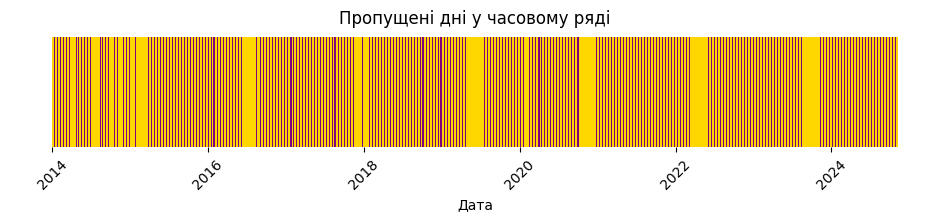

In [ ]:
# Створюємо повний набір дат
full_dates = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')

# Позначаємо, які дати є в датасеті
date_df = pd.DataFrame({'Date': full_dates})
date_df['Exists'] = date_df['Date'].isin(df['Date'])

# Візуалізація як смужка часу
plt.figure(figsize=(12, 1.5))
colors = np.where(date_df['Exists'], 'gold', 'purple')  # Жовтий - є, Фіолетовий - пропущено
plt.bar(date_df['Date'], 1, color=colors, width=1)

plt.xticks(rotation=45)
plt.yticks([])
plt.xlabel('Дата')
plt.title('Пропущені дні у часовому ряді', fontsize=12)
plt.box(False)  # Видаляємо рамку

plt.show()

Нам пощастило. Дані відсутні досить випадково, та ми не маємо великих пропусків (максимум 3 дня поспіль).

Після заповнення пропусків, датасет буде виконувати всі вимоги:
* рівномірний,
* повний,
* великий.

## 📈 Огляд графіків

Розглянемо графіки всіх змінних за часом.

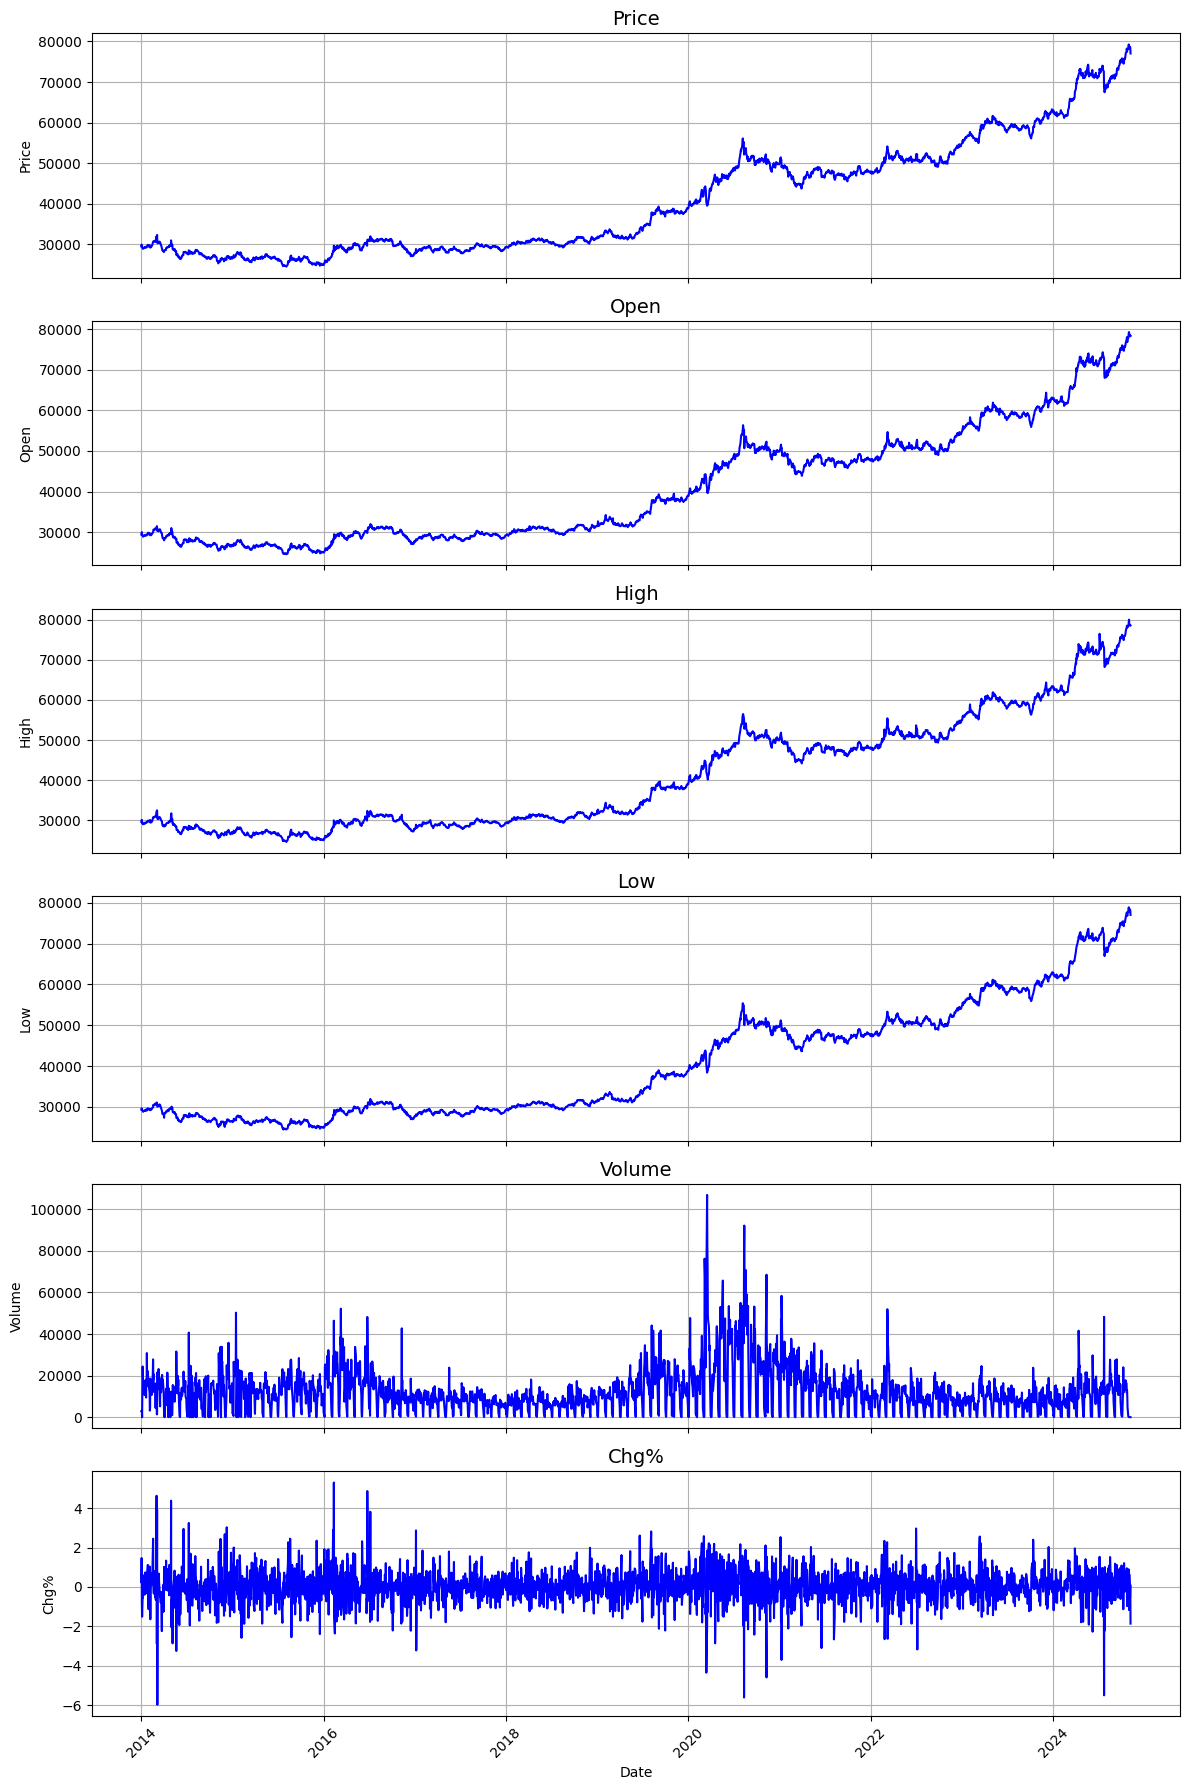

In [ ]:
# Визначаємо список характеристик для відображення
features = ['Price', 'Open', 'High', 'Low', 'Volume', 'Chg%']

# Створюємо окремі графіки для кожної характеристики
fig, axes = plt.subplots(len(features), 1, figsize=(12, 18), sharex=True)

for i, feature in enumerate(features):
    axes[i].plot(df['Date'], df[feature], label=feature, color='b')
    axes[i].set_title(feature, fontsize=14)
    axes[i].set_ylabel(feature)
    axes[i].grid()

# Налаштовуємо спільну вісь X
axes[-1].set_xlabel('Date')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 📉 Зменшення розмірності

Розглянемо кореляції.

Text(0.5, 1.0, 'Кореляційна матриця характеристик')

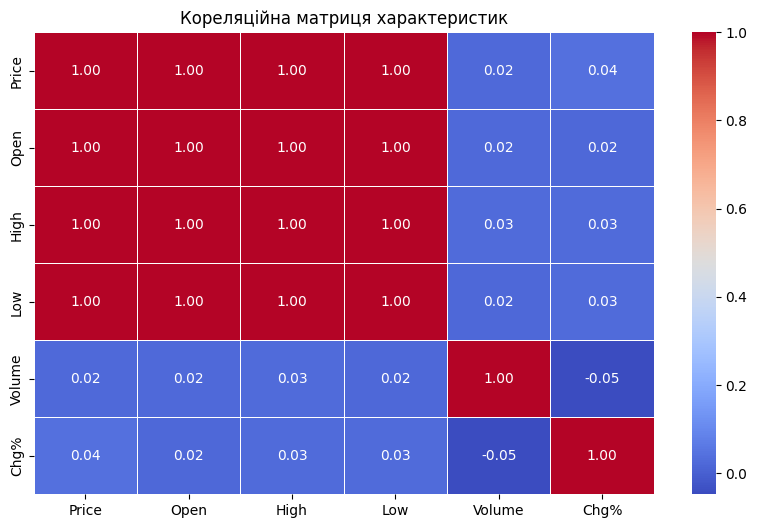

In [ ]:
corr_matrix = df.drop(columns=['Date']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Кореляційна матриця характеристик")

Як можна побачити колонки Price, Low, High та Open по суті є абсолютно однаковими. Можно залишити лише Price.

In [ ]:
df = df.drop(columns=['Low', 'High', 'Open'])

In [ ]:
df

,Date,Price,Volume,Chg%
0,2024-11-06,77030,0,-1.86
1,2024-11-05,78490,0,0.11
2,2024-11-04,78401,0,-0.54
3,2024-11-01,78829,0,0.64
4,2024-10-31,78326,90,-1.17
...,...,...,...,...
2801,2014-01-06,29119,24380,-0.55
2802,2014-01-04,29279,0,-1.51
2803,2014-01-03,29727,3050,-0.83
2804,2014-01-02,29975,3140,1.47


## 🛠️ Заповнення пропусків

Додамо в датасет всі пропущені дати.


In [ ]:
full_dates = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')
full_df = pd.DataFrame({'Date': full_dates})

# Об'єднуємо повний набір з оригінальним датасетом
df_with_missing = pd.merge(full_df, df, on='Date', how='left')

df_with_missing[['Price', 'Volume', 'Chg%']] = df_with_missing[['Price', 'Volume', 'Chg%']].apply(pd.to_numeric, errors='coerce')
df_with_missing.head()

,Date,Price,Volume,Chg%
0,2014-01-01,29542.0,2930.0,0.25
1,2014-01-02,29975.0,3140.0,1.47
2,2014-01-03,29727.0,3050.0,-0.83
3,2014-01-04,29279.0,0.0,-1.51
4,2014-01-05,NaN,NaN,NaN


Спочатку ми відновимо данні про Price які можливо відновити аналітичним методом.

Далі ми можемо гарно апроксимувати відсутні данні інтерполяцією.

Chg% ми обчислимо після відновлення Price повністю, і він має збігатися в відомих точках, а в відновлених та апроксимованих точках ми отримаємо гарну оцінку.

Volume ми просто інтерполюємо так як ми не маємо додаткової інформації.

In [ ]:
def fill_missing_values(df):
    """
    Заповнює пропущені значення у колонках Price аналітично та за допомогою інтерполяції.
    Volume заповнюється нулями.
    Chg% обраховується по результатах інтерплоляції ціни.
    """

    df = df.copy()

    df = df.set_index('Date')
    df = df.asfreq('D')
    df = df.sort_index(ascending=False)

    for i in range(1, len(df)):
        if pd.isna(df.iloc[i]['Price']):
            prev_chg = df.iloc[i - 1]['Chg%']
            prev_price = df.iloc[i - 1]['Price']
            if pd.notna(prev_chg):
                df.iloc[i, df.columns.get_loc('Price')] = prev_price / (1 + prev_chg / 100)

    df['Price'] = df['Price'].interpolate(method='time')

    for i in range(1, len(df)):
        current_price = df.iloc[i - 1]['Price']
        next_price = df.iloc[i]['Price']
        df.iloc[i-1, df.columns.get_loc('Chg%')] = 100 * (current_price / next_price - 1)

    df['Volume'] = df['Volume'].interpolate(method='time')

    return df.reset_index()

In [ ]:
data = fill_missing_values(df_with_missing)

data.sort_values(by='Date')

,Date,Price,Volume,Chg%
3962,2014-01-01,29542.000000,2930.0,0.250000
3961,2014-01-02,29975.000000,3140.0,1.465710
3960,2014-01-03,29727.000000,3050.0,-0.827356
3959,2014-01-04,29279.000000,0.0,-1.507047
3958,2014-01-05,29280.040221,12190.0,0.003553
...,...,...,...,...
4,2024-11-02,78827.831993,0.0,-0.001482
3,2024-11-03,78826.663986,0.0,-0.001482
2,2024-11-04,78401.000000,0.0,-0.540000
1,2024-11-05,78490.000000,0.0,0.113519


In [ ]:
df_with_missing

,Date,Price,Volume,Chg%
0,2014-01-01,29542.0,2930.0,0.25
1,2014-01-02,29975.0,3140.0,1.47
2,2014-01-03,29727.0,3050.0,-0.83
3,2014-01-04,29279.0,0.0,-1.51
4,2014-01-05,NaN,NaN,NaN
...,...,...,...,...
3958,2024-11-02,NaN,NaN,NaN
3959,2024-11-03,NaN,NaN,NaN
3960,2024-11-04,78401.0,0.0,-0.54
3961,2024-11-05,78490.0,0.0,0.11


Як ми бачимо, значеня Chg% трохи змінилися навіть в відомих клітинах, але це пов'язано з проблеомою округлення і в цілому значення вірні.

Подивимося відновленні графіки.

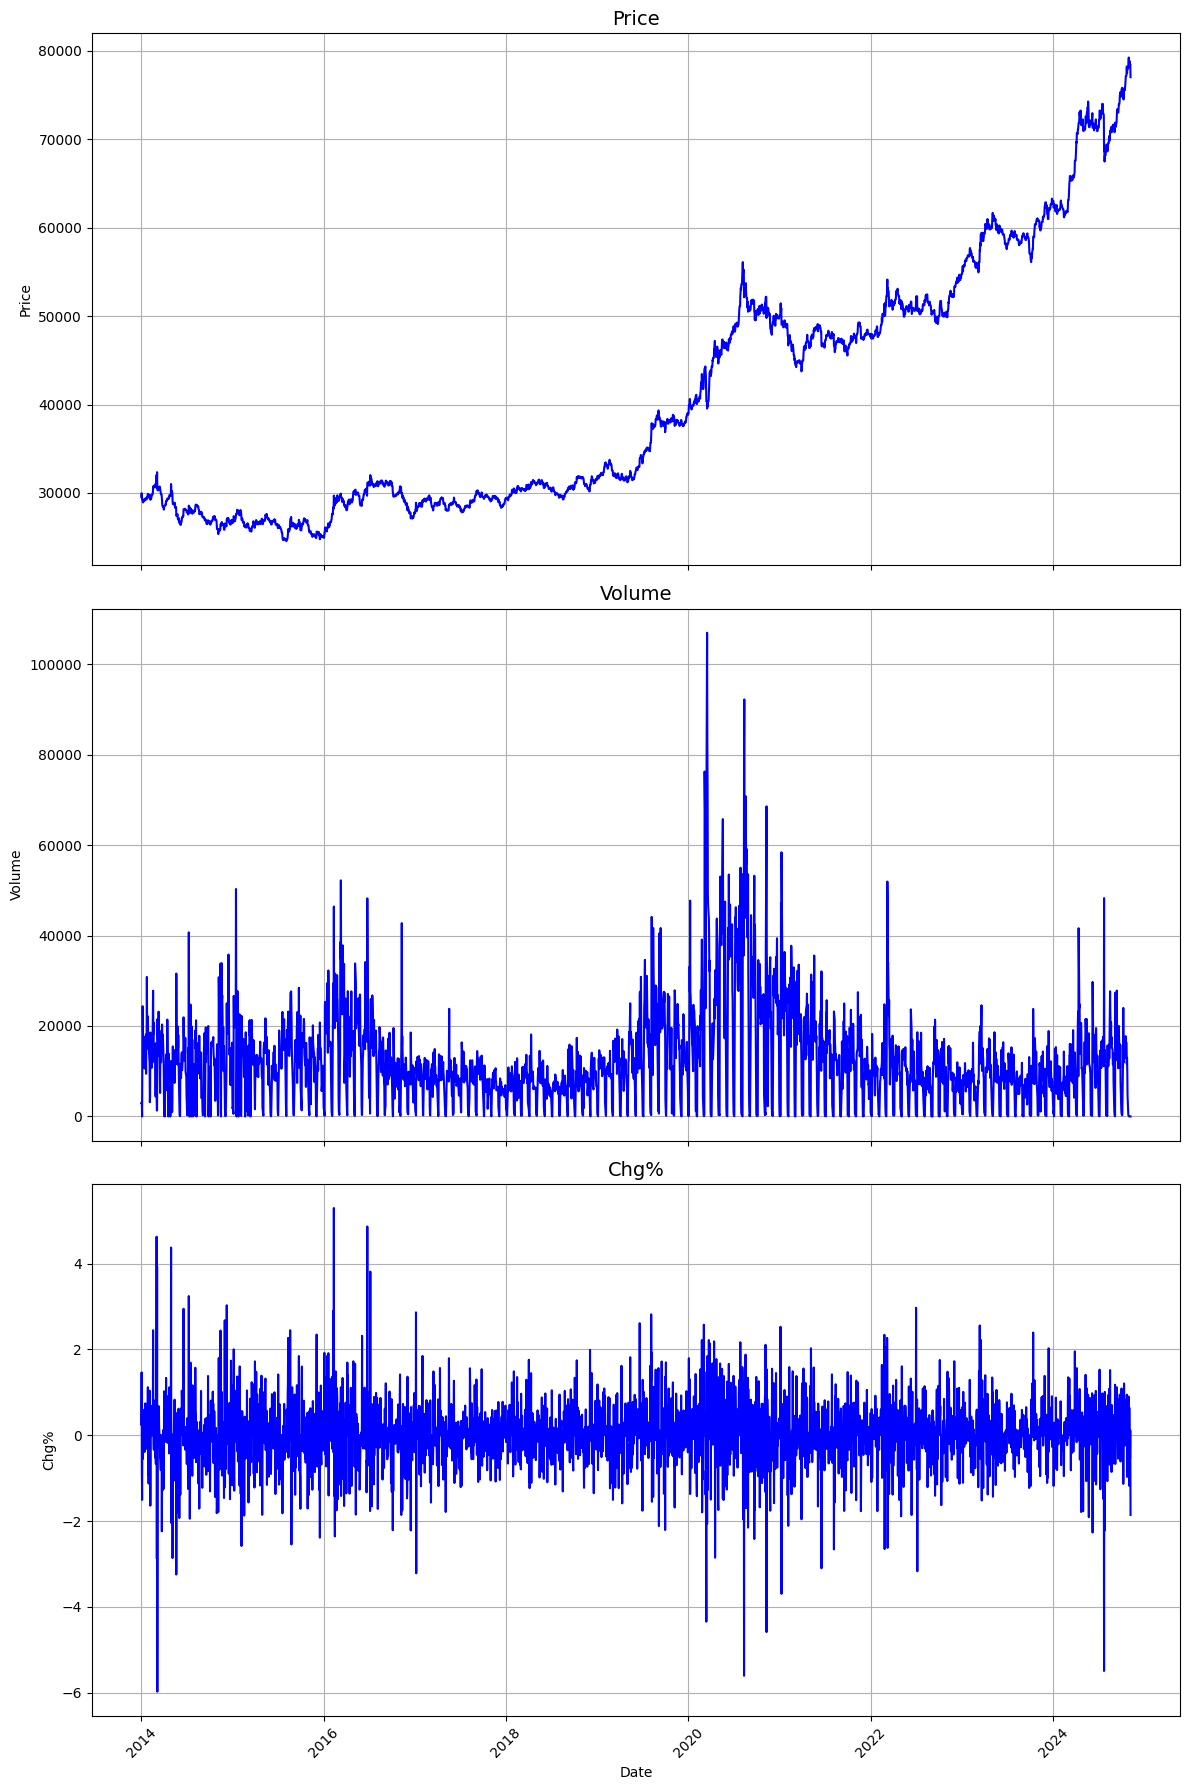

In [ ]:
features = ['Price','Volume', 'Chg%']

fig, axes = plt.subplots(len(features), 1, figsize=(12, 18), sharex=True)

for i, feature in enumerate(features):
    axes[i].plot(data['Date'], data[feature], label=feature, color='b')
    axes[i].set_title(feature, fontsize=14)
    axes[i].set_ylabel(feature)
    axes[i].grid()

axes[-1].set_xlabel('Date')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 🚦 Фільтрація

Проведемо данні через фільтри.
В наших данних багато викидів та достатньо шуму, отже нас здебільшого цікавить:
- Зниження шуму,
- Згладжування,
- Ліквідація викидів.



Спочатку приберемо викиди за правилом трьох відхилень:

In [ ]:
def remove_outliers(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    mask = np.abs(df[column] - mean) > (threshold * std)
    df.loc[mask, column] = np.nan
    return df

In [ ]:
data = remove_outliers(data, 'Price')
data = remove_outliers(data, 'Volume')

In [ ]:
data = remove_outliers(data, 'Chg%')

Приберемо шум та згадимо данні за допомогою фільтру Калмана.

In [ ]:
def apply_kalman_filter(series):
    series = series.copy()

    if pd.isna(series.iloc[0]):
        series.iloc[0] = series.mean()

    kf = KalmanFilter(initial_state_mean=series.iloc[0],
                      n_dim_obs=1,
                      initial_state_covariance=1,
                      transition_matrices=[1],
                      observation_matrices=[1],
                      observation_covariance=1,
                      transition_covariance=0.01)

    state_means, _ = kf.filter(series.fillna(method="ffill"))
    return state_means.flatten()

In [ ]:
data['Price'] = apply_kalman_filter(data['Price'])
data['Volume'] = apply_kalman_filter(data['Volume'])

<ipython-input-95-299c89de6bf7>:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  state_means, _ = kf.filter(series.fillna(method="ffill"))


In [ ]:
data['Volume'] = apply_kalman_filter(data['Chg%'])

<ipython-input-95-299c89de6bf7>:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  state_means, _ = kf.filter(series.fillna(method="ffill"))


In [ ]:
data.head(5)

,Date,Price,Volume,Chg%
0,2024-11-06,77030.000000,-1.860110,-1.860110
1,2024-11-05,77523.112583,-1.193520,0.113519
2,2024-11-04,77749.626603,-1.024897,-0.540000
3,2024-11-03,77977.279968,-0.808578,-0.001482
4,2024-11-02,78131.440201,-0.662294,-0.001482


Розглянемо нові графіки.

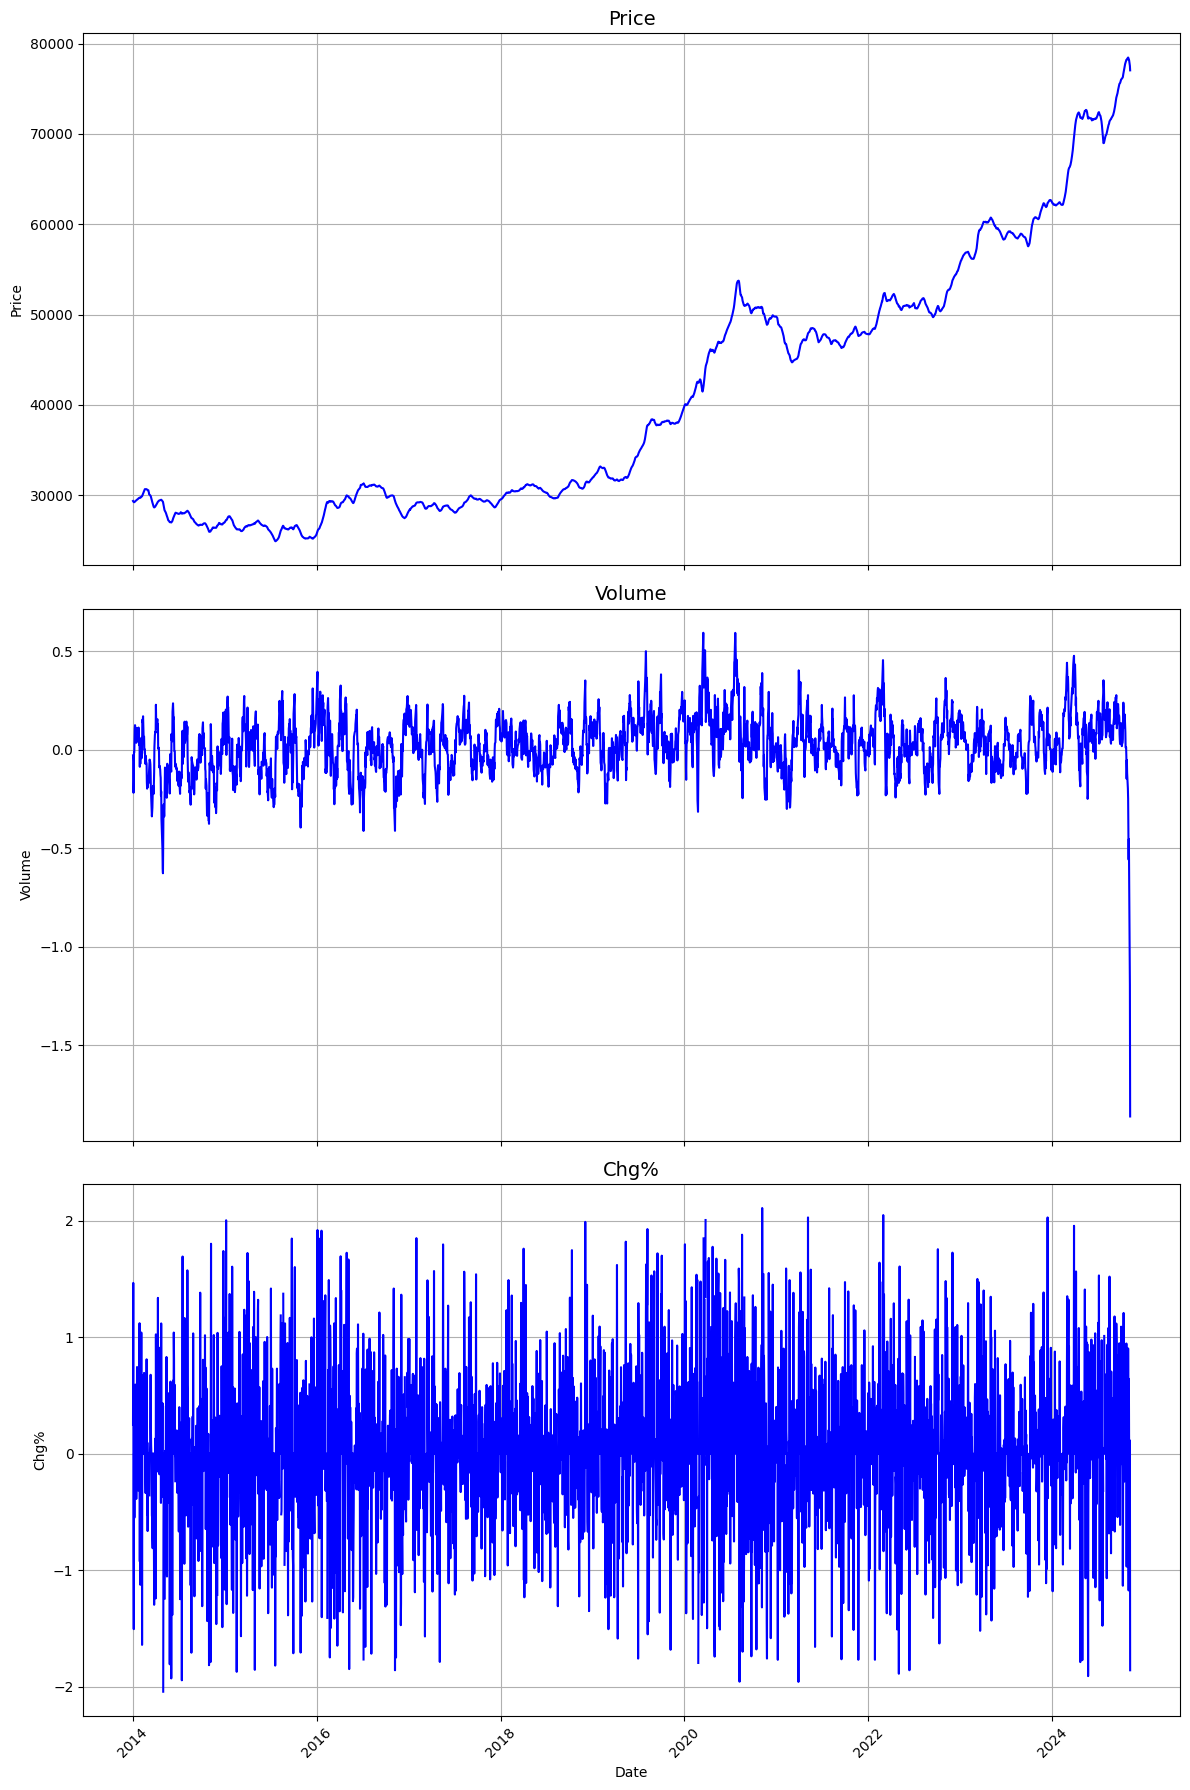

In [ ]:
features = ['Price','Volume', 'Chg%']

fig, axes = plt.subplots(len(features), 1, figsize=(12, 18), sharex=True)

for i, feature in enumerate(features):
    axes[i].plot(data['Date'], data[feature], label=feature, color='b')
    axes[i].set_title(feature, fontsize=14)
    axes[i].set_ylabel(feature)
    axes[i].grid()

axes[-1].set_xlabel('Date')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 🔍 Висновки

В цій роботі наша команда:
* опрацювала датасет,
* провела початок EDA,
* зменшила розмірності,
* заповнила пропуски,
* застосувала фільтри,
* привела графіки.

Отже ми виконали всі умови роботи і сподіваємося на золото (максимальний бал 😁).

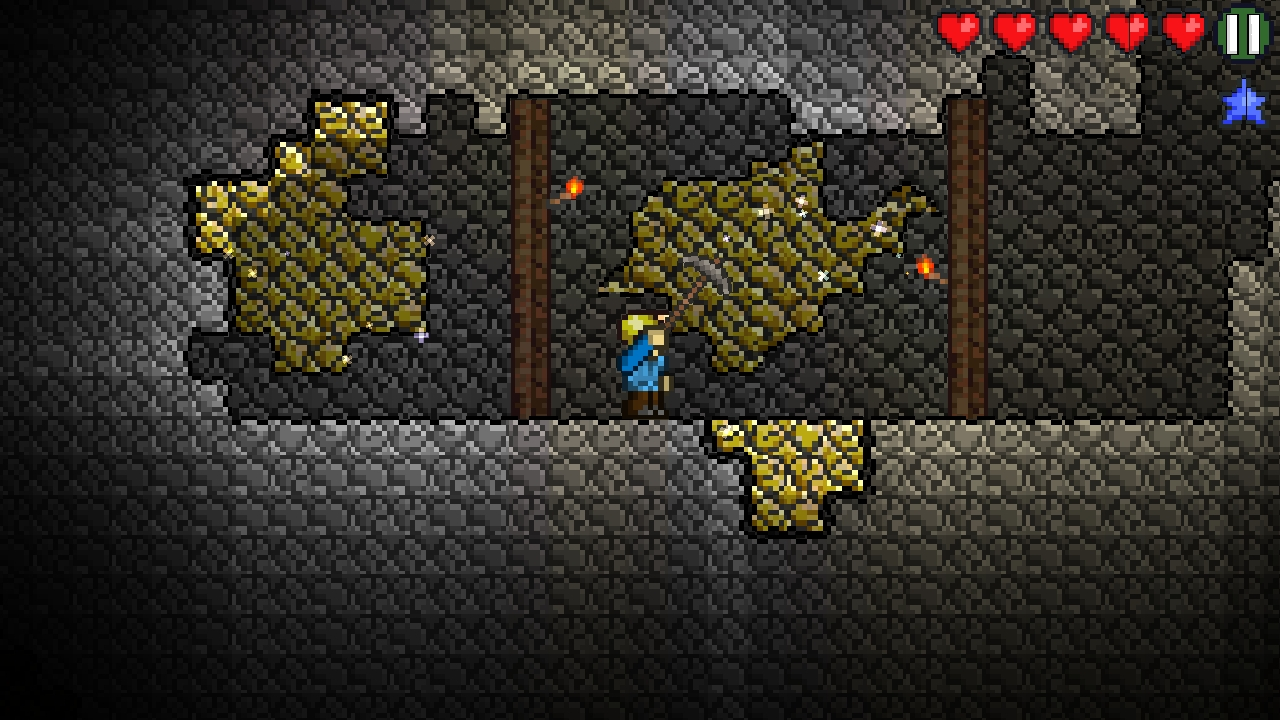

## 🦺 Збереження датасету

In [ ]:
data.to_csv('/content/drive/MyDrive/Datasets/Gold Price Part 1_1.csv', index=False)

## [❤️ Бонус](https://www.youtube.com/watch?v=qJa-VFwPpYA&ab_channel=Gorillaz)